<a href="https://colab.research.google.com/github/svperbeast/ai_lab/blob/main/outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.Outlier detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

#### (1) boxplot-based outlier detection
###### - using iris dataset

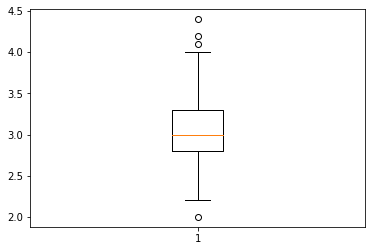

In [2]:
iris = load_iris()
ex = iris.data[:,1]
boxplot =  plt.boxplot(ex)

###### - function to denoise a variable

In [3]:
def boxplot_whiskers(x):
    boxplot = plt.boxplot(x)
    boxplot_whiskers = [item.get_ydata() for item in boxplot['whiskers']]
    return(boxplot_whiskers)

In [4]:
def my_denoising(x):
    y = boxplot_whiskers(x)
    z = x[(x>=np.min(y))&(x<=np.max(y))]
    return(z)

In [5]:
def my_outlier_detect(x):
    y = boxplot_whiskers(x)
    out_idx = np.where((x<np.min(y))|(x>np.max(y)))[0]
    out_values = x[out_idx]
    boxplot = plt.boxplot(x[-out_idx])
    return(pd.DataFrame({'outlier_index': out_idx,'outliers': out_values}))

   outlier_index  outliers
0             15       4.4
1             32       4.1
2             33       4.2
3             60       2.0


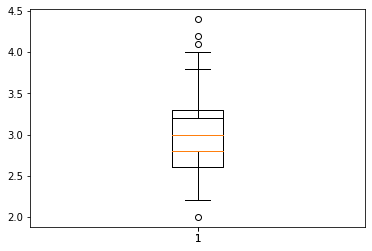

In [6]:
print(my_outlier_detect(ex))

[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  3.9 3.5 3.8
 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 3.1 3.2 3.5 3.6 3.
 3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3 2.8 2.8 3.3
 2.4 2.9 2.7 3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8 2.5 2.8 2.9 3.
 2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5 2.6 3.  2.6 2.3
 2.7 3.  2.9 2.9 2.5 2.8 3.3 2.7 3.  2.9 3.  3.  2.5 2.9 2.5 3.6 3.2 2.7
 3.  2.5 2.8 3.2 3.  3.8 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2 2.8 3.  2.8 3.
 2.8 3.8 2.8 2.8 2.6 3.  3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2 3.3 3.  2.5 3.
 3.4 3. ]


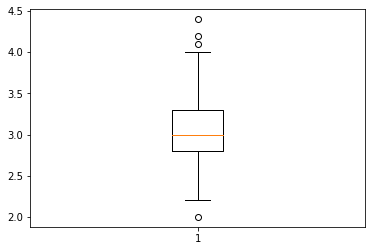

In [7]:
print(my_denoising(ex))

#### (2) mahalanobis distance based outlier detection

In [8]:
from scipy.special import chdtri
from sklearn.decomposition import PCA

###### - import mahalanobis function

In [9]:
def mahalanobis(x):
    iv = np.linalg.inv(np.cov(np.transpose(x)))
    u = x
    v = np.tile(np.mean(x,axis=0),(len(x),1))
    return(np.diag(np.dot(np.dot((u-v),iv),np.transpose(u-v))))

In [10]:
mh_dist = mahalanobis(iris.data)
mh_out = np.where(mh_dist>chdtri(4,0.025))[0]

###### - PCA

더 좋은 차원 축소 방법이 있음..

In [11]:
pca = PCA(n_components=2)
iris_pca=pca.fit_transform(iris.data)

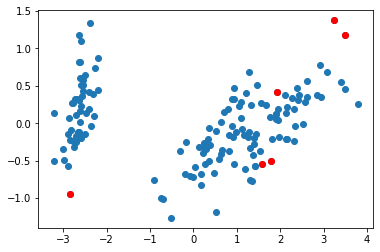

In [12]:
plt.scatter(x=iris_pca[:,0],y=iris_pca[:,1])
plt.scatter(x=iris_pca[mh_out,0],y=iris_pca[mh_out,1],marker='o',color='red')

#### (3) KNN based outlier detection
###### - KNN

(array([16., 51., 71., 47., 40., 49., 39., 20., 27.,  8., 19., 13.,  9.,
        12.,  3.,  9.,  7.,  5.,  7.,  6.,  1.,  8.,  4.,  6.,  3.,  3.,
         2.,  0.,  1.,  3.,  1.,  1.,  0.,  1.,  0.,  1.,  2.,  1.,  2.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.02064036, 0.04570969, 0.07077903, 0.09584836, 0.12091769,
        0.14598702, 0.17105635, 0.19612568, 0.22119501, 0.24626434,
        0.27133367, 0.29640301, 0.32147234, 0.34654167, 0.371611  ,
        0.39668033, 0.42174966, 0.44681899, 0.47188832, 0.49695765,
        0.52202699, 0.54709632, 0.57216565, 0.59723498, 0.62230431,
        0.64737364, 0.67244297, 0.6975123 , 0.72258163, 0.74765097,
        0.7727203 , 0.79778963, 0.82285896, 0.84792829, 0.87299762,
        0.89806695, 0.92313628, 0.94820561, 0.97327495, 0.99834428,
        1.02341361, 1.04848294, 1.07355227, 1.0986216 , 1.12369093,
        1.14876026, 1.17382959, 1.19889893, 1.22396826, 1.24903759,
        1.27410692]),
 <a list of 50

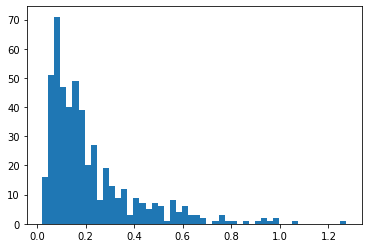

In [13]:
dt = pd.read_csv('data01.csv')
from sklearn.neighbors import KDTree
k = 3
tree = KDTree(dt)
result_knn = tree.query(dt,k)
outlier_scores = result_knn[0][:,k-1]
plt.hist(outlier_scores,bins=50)

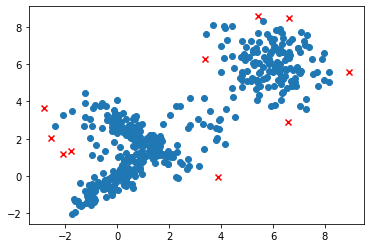

In [14]:
out_idx = np.where(outlier_scores>=0.8)[0] # pick 0.8 for the threshold
plt.scatter(dt.drop(out_idx).iloc[:,0],dt.drop(out_idx).iloc[:,1])
plt.scatter(dt.iloc[out_idx,0],dt.iloc[out_idx,1],color='red',marker='x')

###### - aggregated KNN

(array([19., 59., 68., 52., 46., 45., 26., 26., 23., 14.,  8., 21.,  6.,
        10.,  9.,  9.,  8.,  1.,  8.,  8.,  2.,  3.,  3.,  4.,  4.,  1.,
         2.,  2.,  2.,  2.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  2.,  0.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.03400639, 0.07791879, 0.12183119, 0.16574358, 0.20965598,
        0.25356838, 0.29748078, 0.34139318, 0.38530558, 0.42921798,
        0.47313037, 0.51704277, 0.56095517, 0.60486757, 0.64877997,
        0.69269237, 0.73660477, 0.78051716, 0.82442956, 0.86834196,
        0.91225436, 0.95616676, 1.00007916, 1.04399155, 1.08790395,
        1.13181635, 1.17572875, 1.21964115, 1.26355355, 1.30746595,
        1.35137834, 1.39529074, 1.43920314, 1.48311554, 1.52702794,
        1.57094034, 1.61485273, 1.65876513, 1.70267753, 1.74658993,
        1.79050233, 1.83441473, 1.87832713, 1.92223952, 1.96615192,
        2.01006432, 2.05397672, 2.09788912, 2.14180152, 2.18571392,
        2.22962631]),
 <a list of 50

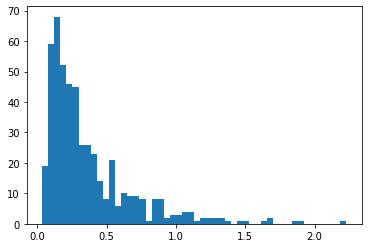

In [15]:
tree = KDTree(dt)
result_knn = tree.query(dt,k)
outlier_scores = np.sum(result_knn[0],axis=1)
plt.hist(outlier_scores,bins=50)

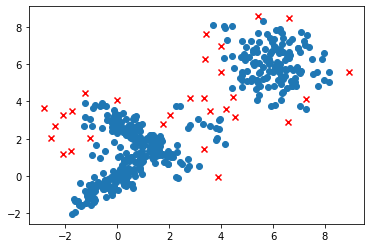

In [16]:
out_idx = np.where(outlier_scores>=1)[0]
plt.scatter(dt.drop(out_idx).iloc[:,0],dt.drop(out_idx).iloc[:,1])
plt.scatter(dt.iloc[out_idx,0],dt.iloc[out_idx,1],color='red',marker='x')

#### (4) Local outlier factor

In [17]:
from sklearn.neighbors import LocalOutlierFactor

In [18]:
clf = LocalOutlierFactor(n_neighbors=4)
clf.fit(iris.data)
outlier_scores = -clf.negative_outlier_factor_

(array([ 1.,  0.,  2., 10., 12., 30., 17., 16.,  6.,  8.,  6.,  6.,  3.,
         7.,  3.,  4.,  5.,  0.,  0.,  1.,  2.,  4.,  1.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.83065469, 0.8621713 , 0.89368791, 0.92520453, 0.95672114,
        0.98823776, 1.01975437, 1.05127098, 1.0827876 , 1.11430421,
        1.14582082, 1.17733744, 1.20885405, 1.24037067, 1.27188728,
        1.30340389, 1.33492051, 1.36643712, 1.39795373, 1.42947035,
        1.46098696, 1.49250358, 1.52402019, 1.5555368 , 1.58705342,
        1.61857003, 1.65008665, 1.68160326, 1.71311987, 1.74463649,
        1.7761531 , 1.80766971, 1.83918633, 1.87070294, 1.90221956,
        1.93373617, 1.96525278, 1.9967694 , 2.02828601, 2.05980263,
        2.09131924, 2.12283585, 2.15435247, 2.18586908, 2.21738569,
        2.24890231, 2.28041892, 2.31193554, 2.34345215, 2.37496876,
        2.40648538]),
 <a list of 50

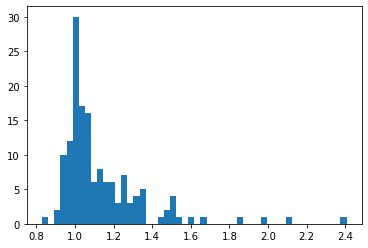

In [19]:
plt.hist(outlier_scores,bins=50)

In [20]:
out_idx = np.where(outlier_scores>=1.5)[0]

In [21]:
pca = PCA(n_components=2)
iris_pca=pca.fit_transform(iris.data)

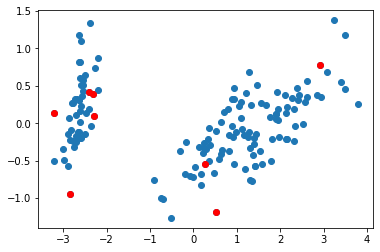

In [22]:
plt.scatter(x=iris_pca[:,0],y=iris_pca[:,1])
plt.scatter(x=iris_pca[out_idx,0],y=iris_pca[out_idx,1],marker='o',color='red')

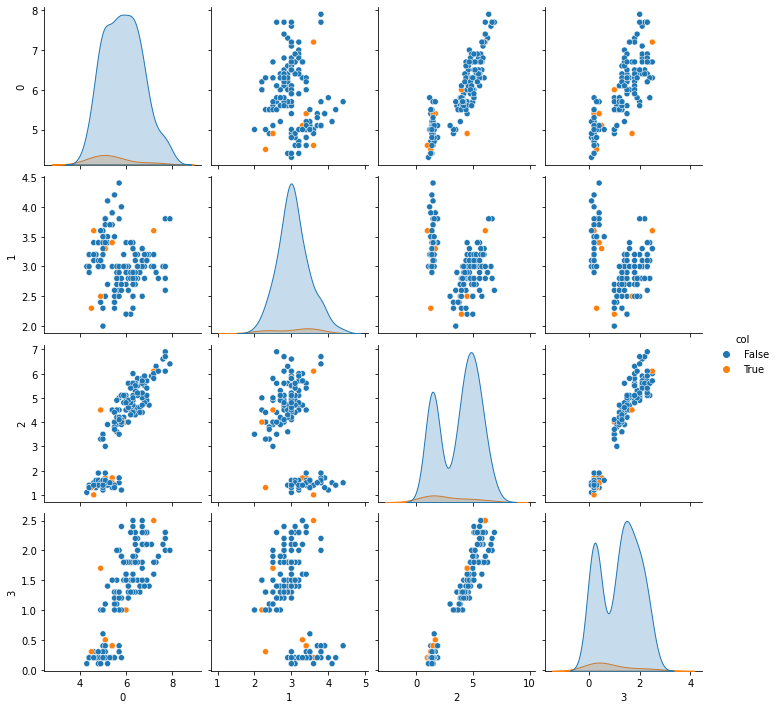

In [23]:
import seaborn as sns
d = pd.DataFrame(iris.data)
d.insert(2, 'col', np.in1d(1*np.arange(0, 150), out_idx))
sns.pairplot(d, hue='col')